# Import libraries

In [23]:
import pandas as pd
%pylab inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import pickle

# Load Dataset

In [2]:
car = pd.read_csv('cars_price.csv')
print('shape : ',car.shape)
car.head()

shape :  (40000, 13)


,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [3]:
car['Unnamed: 0'].nunique()    

40000

we have 40000 rows of data and ['Unnamed: 0'] has unique value for each row.

must be dropped

In [3]:
car.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
car.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [6]:
car.describe(include='all')

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
count,40000,40000,40000.000000,40000.000000,40000,4.000000e+04,40000,39970.000000,40000,40000,38655,36245
unique,93,991,NaN,NaN,3,NaN,3,NaN,13,2,4,9
top,volkswagen,passat,NaN,NaN,with mileage,NaN,petrol,NaN,black,mechanics,front-wheel drive,D
freq,4943,1532,NaN,NaN,39337,NaN,25869,NaN,8867,25630,27074,8985
mean,NaN,NaN,7430.383775,2003.485625,NaN,2.434332e+05,NaN,2103.201676,NaN,NaN,NaN,NaN
std,NaN,NaN,8338.242134,8.114896,NaN,3.167033e+05,NaN,938.724653,NaN,NaN,NaN,NaN
min,NaN,NaN,95.000000,1938.000000,NaN,0.000000e+00,NaN,500.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2350.000000,1998.000000,NaN,1.370000e+05,NaN,1600.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5350.000000,2004.000000,NaN,2.280000e+05,NaN,1995.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,9850.000000,2010.000000,NaN,3.087610e+05,NaN,2300.000000,NaN,NaN,NaN,NaN


In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
make                   40000 non-null object
model                  40000 non-null object
priceUSD               40000 non-null int64
year                   40000 non-null int64
condition              40000 non-null object
mileage(kilometers)    40000 non-null float64
fuel_type              40000 non-null object
volume(cm3)            39970 non-null float64
color                  40000 non-null object
transmission           40000 non-null object
drive_unit             38655 non-null object
segment                36245 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


# • Draw important conclusion from the data (eg. priceUSD vs Mileage or year and segment vs price):

**• priceUSD vs Mileage**

Text(0.5, 1.0, 'Price distribution')

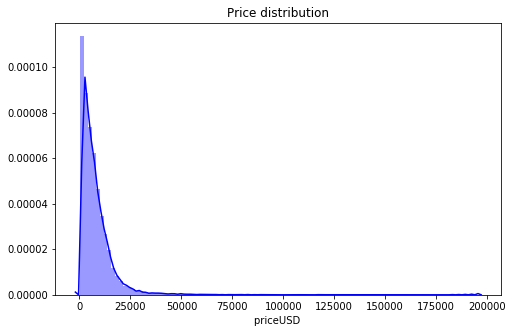

In [8]:
plt.figure(figsize=(8,5))

sns.distplot(car['priceUSD'], bins=100, color='blue')
plt.xlabel('priceUSD ')
plt.title('Price distribution')

plot is right skewed.<br>
Most of the cars have price range less than 25000 USD.

Text(0.5, 1.0, 'Mileage distribution')

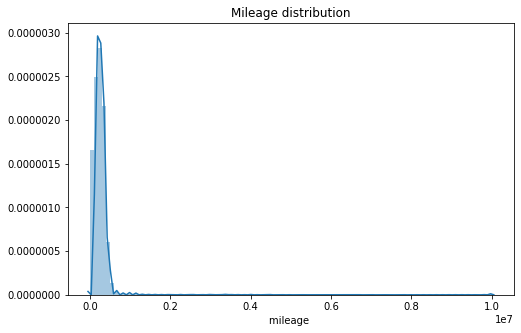

In [9]:
plt.figure(figsize=(8,5))

sns.distplot(car['mileage(kilometers)'], bins=100)
plt.xlabel('mileage ')
plt.title('Mileage distribution')

most of cars have mileage less than 0.1*1e7 ( i.e., 1000000 km)

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


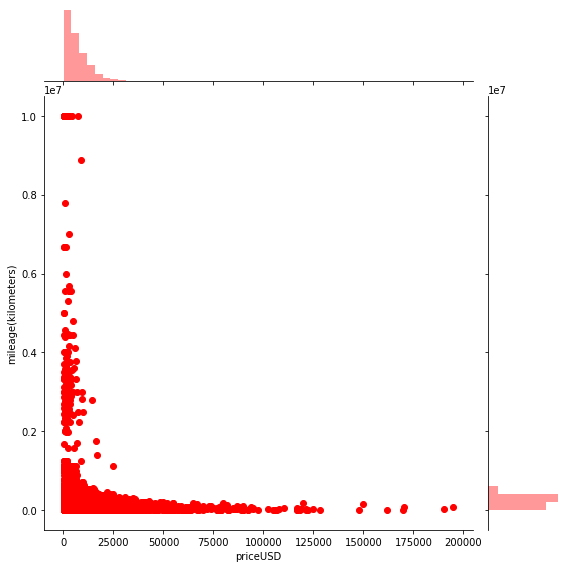

In [10]:
sns.jointplot(car['priceUSD'], car['mileage(kilometers)'], color='red', size=8)


Above plot shows, <br>
cars with less price has higher mileage (i.e., has ran more kilometers)<br>
and cars with higher price has much lower mileage.


**• priceUSD vs year**

In [11]:
year_wise = car.groupby('year')['priceUSD'].mean()

mean price of cars each year.

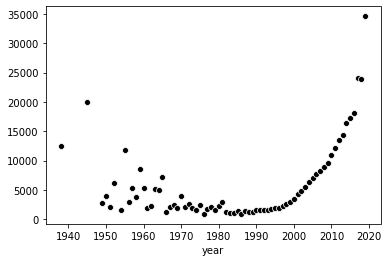

In [12]:
sns.scatterplot(year_wise.index, year_wise.values, color='black')

data from 1940-1970 doesn't shows any trend, possibly because we have much lower data of cars and their price with those particular year range.
<br> **But later on we can see price of cars gradually increased every following year.**

**• segment vs priceUSD**

In [13]:
temp = car.groupby('segment')['priceUSD'].mean()
segment_wise = pd.DataFrame(temp)

In [14]:
segment_wise.sort_values('priceUSD', ascending= False, inplace=True )

segment_wise

,priceUSD
segment,
S,17349.550091
J,14516.228697
F,10901.606383
M,6916.101500
E,6238.832840
D,5322.893823
C,4872.817020
A,4560.743976
B,4325.038363


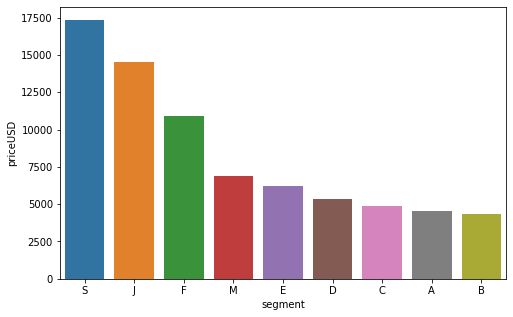

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x = segment_wise.index ,y = segment_wise['priceUSD'])

segment **'S'** are most costly with almost 17500 USD average price per car.
while **'B'** segment cars are cheapest.

# • Create a model to predict the priceUSD columns.

In [16]:
print('shape  : ',car.shape)
car.head()

shape  :  (40000, 12)


,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


check missing/null values

In [17]:
car.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

*'volume(cm3)*' has 30, *'drive_unit'* has 1345 and *'segment'* has 3755 null values out of 40000 datapoints.<br>
so, missing values will not hinder our predictions much.

# missing values imputation

**volume**

In [18]:
mean_volume = car['volume(cm3)'].mean()

car['volume(cm3)'].fillna( mean_volume, inplace=True)    # fill missing values with mean

**segment**<br>
We will fill missing values of segment as according to their manufacturer most made segment cars.

In [19]:
makers = car['make'].value_counts()[:25].index     # top 25 car manufacturers

maker_segment = {}                       # empty dictionary

for maker in makers:
    mode_segment = car[car['make']==maker]['segment'].value_counts().index[0]
    maker_segment[maker] = mode_segment
    
    # 'maker_Segment' has manufacturer as key and their most made type of segment as value.

# Apply the mapping to missing segment obs.
for maker in makers:
    car.loc[ (car['segment'].isnull() ) & (car['make']==maker ) , 'segment' ] = maker_segment[maker]
    
    
# those who didnt get mapped. we will fill those with mode of segment.
car['segment'].fillna(car['segment'].mode()[0], inplace=True)

**drive_unit**

In [20]:
# fill with mode of drive_unit

car['drive_unit'].fillna(car['drive_unit'].mode()[0], inplace=True)

**function to fill missing values**

In [5]:
def missing_values_imputation(df):
    
    df['volume(cm3)'].fillna( car['volume(cm3)'].mean() , inplace=True)
    
    makers = df['make'].value_counts()[:25].index
    maker_segment = {}                       # dictionary
    
    for maker in makers:
        mode_segment = df[df['make']==maker]['segment'].value_counts().index[0]
        maker_segment[maker] = mode_segment
    
    df.loc[ ( df['segment'].isnull() ) & (df['make']==maker ) , 'segment' ] = maker_segment[maker]
    df['segment'].fillna(df['segment'].mode()[0], inplace=True)
    
    df['drive_unit'].fillna(df['drive_unit'].mode()[0], inplace=True)


In [6]:
# missing_values_imputation(car)

In [6]:
car.isnull().sum()

make                   0
model                  0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
dtype: int64

now we have no null values and we can move further towards model building.

In [23]:
car.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [7]:
cat_col = car.select_dtypes(include='O').columns

num_col = car.select_dtypes(include=np.number).columns
print(cat_col)
print(num_col)

Index(['make', 'model', 'condition', 'fuel_type', 'color', 'transmission',
       'drive_unit', 'segment'],
      dtype='object')
Index(['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)'], dtype='object')


In [8]:
def no_of_unique(df):
    for col in cat_col:
        print(col, ' : ',df[col].nunique(),' unique values')
        
no_of_unique(car)

make  :  93  unique values
model  :  991  unique values
condition  :  3  unique values
fuel_type  :  3  unique values
color  :  13  unique values
transmission  :  2  unique values
drive_unit  :  4  unique values
segment  :  9  unique values


In [9]:
high_unique_category = [ col for col in cat_col if car[col].nunique()>15]
low_unique_category = [ col for col in cat_col if car[col].nunique()<=15]

print(high_unique_category)
print(low_unique_category)

['make', 'model']
['condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']


# Model

# Data encoding

we have some categorical column with high no. of unique categories. (such as 'make' and 'model )<br>
one-hot encoding of such variables will make thousands of new variables.<br> 

we know car prices mostly depends on their brand and model.<br>
so we will make our very own encoder to encode them according to their respective mean prices. ( i.e., category which has higher mean price gets higher number while encoding ).

In [10]:
def ordinal_encoder(df, col):
    temp = df.groupby(col)['priceUSD'].mean() 
    col_wise_price = pd.DataFrame(temp).sort_values('priceUSD')

    for i, order in enumerate(col_wise_price.index):
        df.loc[ df[col] == order, col ] = i

        
def dataframe_encoder(df):
    for cat in high_unique_category:
        ordinal_encoder(df, cat)
    
    df = pd.get_dummies(df)                     # columns which are not encoded ordinally will get one-hot encoded here.
    return df

In [11]:
car_df = dataframe_encoder(car)  

In [12]:
car_df.head()

,make,model,priceUSD,year,mileage(kilometers),volume(cm3),condition_for parts,condition_with damage,condition_with mileage,fuel_type_diesel,...,drive_unit_rear drive,segment_A,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,55,501,565,1993,960015.0,2000.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,46,390,5550,2008,172000.0,1400.0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,52,668,8300,2008,223000.0,2500.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,51,336,3300,2005,140000.0,1200.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,52,215,2450,2002,413000.0,2200.0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [13]:
x = car_df[ car_df.columns[car_df.columns!='priceUSD'] ]
y = car_df['priceUSD']

In [14]:
def split_train_test( x, y, test_size):
   
    x_train,x_test, y_train, y_test = train_test_split( x,y, test_size= test_size, random_state= 7 )
 
    return x_train, x_test, y_train,y_test

In [15]:
x_train, x_test, y_train, y_test = split_train_test( x, y, test_size=0.22)

x_train, x_val, y_train, y_val = split_train_test( x_train, y_train, test_size= x_test.shape[0]/x_train.shape[0]  )


In [16]:
print(x_train.shape,x_test.shape, x_val.shape)

(22400, 39) (8800, 39) (8800, 39)


In [17]:
def get_model(algorithm, x_train,y_train ):
    
    model = algorithm

    model.fit(x_train, y_train)
    
    return model

In [18]:
def model_report(model, x, y):
    pred = model.predict(x)
    print('mean absolute error : ', mean_absolute_error(y, pred) )
    print('r2 score : ', r2_score(y, pred) )

# hyperparamter tuning
using GridSearchCV

tried many base models with different algorithm, XGBoost working better among all of them.<br>
proceeding with XGBoost and tuning paramters

In [29]:
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[4,5,6,7]
}

gscv = GridSearchCV( XGBRegressor(), param_grid, cv=3, verbose=0)           # using XGBRegressor
gscv.fit(x_train, y_train)

best_params = gscv.best_params_
print('best_parameters : ', best_params)

best_parameters :  {'max_depth': 5, 'n_estimators': 300}


In [30]:
final_model = get_model( XGBRegressor( **best_params ), x_train,y_train )


**Evaluating model on validation set**

In [21]:
model_report( final_model, x_val,y_val )

mean absolute error :  1101.6829990225488
r2 score :  0.9127331582618095


**Evaluating model on test set**

In [22]:
model_report(final_model, x_test, y_test)

mean absolute error :  1090.2315641055325
r2 score :  0.9183794207127505


***SAVE MODEL***

In [25]:
filename = 'model_car_price.py'

pickle.dump( final_model, open(filename, 'wb'))